May remove?


In [1]:
%pip install -U scikit-learn
%pip install -U imbalanced-learn
%pip install xgboost
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly==5.18.0
%pip install nbformat 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1 Big picture

The goal of this dataset is to predict the movement type of a person based off of labeled accelerometer data
this is a supervised task witha prelabeled dataset

We consider this a classification task, with a categorical output to the kind of activity the trackee is doing, and we're using batch learning from a prelabeled dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


each df is a single person, we choose 3 to give ourselves a more varied dataset

# Task 2: download Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/508.csv")
df_2 = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/509.csv")
df_3 = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/510.csv")
# df_4 = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/511.csv")

concat_data = pd.concat([df,df_2,df_3], ignore_index=True, sort=False)



# Task 3 Visualize Data

In [4]:
concat_data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-04-16 14:30:21.245,-0.875977,0.059082,-0.525391,-0.984863,-0.064209,-0.112549,6
1,2021-04-16 14:30:21.264,-0.859131,0.052246,-0.530762,-1.000732,-0.043945,-0.124756,6
2,2021-04-16 14:30:21.284,-0.840820,0.020020,-0.515381,-0.998535,-0.009521,-0.108154,6
3,2021-04-16 14:30:21.305,-0.838135,-0.000977,-0.512207,-0.981445,0.039795,-0.109375,6
4,2021-04-16 14:30:21.325,-0.841309,-0.005127,-0.513672,-0.963379,0.088379,-0.109375,6


drop the target values

In [5]:
concat_data.drop(labels=['timestamp'], axis=1, inplace=True)

In [6]:
y = pd.DataFrame(concat_data['label'])
X = pd.DataFrame(concat_data.drop(['label'], axis=1))


In [7]:
concat_data.value_counts()

back_x     back_y     back_z     thigh_x    thigh_y    thigh_z    label
-0.972168   0.206055   0.114502  -0.140625  -0.109375  -1.078125  7        664
-0.171875  -0.203125   0.890625   0.187500   0.218750  -1.031250  8        579
-0.546875   0.031250   0.750000   0.046875   0.312500  -1.015625  7        409
-0.531250   0.015625   0.750000   0.046875   0.312500  -1.015625  7        347
-0.367188   0.062988   0.921631   0.062500  -0.015625  -1.078125  8        308
                                                                          ... 
-0.970703  -0.242920  -0.023438  -0.815918   0.190430  -0.162354  1          1
           -0.250000  -0.111328  -0.805420   0.087891  -0.262207  3          1
-0.970947   0.350586  -0.648193  -1.552002   0.092529   0.316650  1          1
            0.309082  -0.592285  -1.507812   0.089355   0.196777  1          1
 0.363037  -0.089355  -0.049561  -0.239990  -0.852051  -1.287842  1          1
Name: count, Length: 359702, dtype: int64

In [8]:
concat_data.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,374318.000000,374318.000000,374318.000000,374318.000000,374318.000000,374318.000000,374318.000000
mean,-0.832904,-0.026604,-0.007990,-0.655391,0.089511,-0.334261,3.844555
std,0.296723,0.218513,0.440818,0.620826,0.320547,0.535462,2.947256
min,-4.333252,-1.272949,-1.996338,-7.548828,-5.142578,-6.362061,1.000000
25%,-0.985596,-0.109375,-0.312256,-0.989746,-0.056152,-0.941895,1.000000
50%,-0.920166,0.015625,-0.159912,-0.921387,0.046875,-0.126221,3.000000
75%,-0.750732,0.097168,0.302979,0.044678,0.218750,0.063477,7.000000
max,0.363037,1.576660,1.179199,3.395264,4.931396,3.953369,8.000000


In [9]:
concat_data.shape

(374318, 7)

In [10]:
concat_data.duplicated().sum()

14616

In [11]:
concat_data.drop_duplicates()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.875977,0.059082,-0.525391,-0.984863,-0.064209,-0.112549,6
1,-0.859131,0.052246,-0.530762,-1.000732,-0.043945,-0.124756,6
2,-0.840820,0.020020,-0.515381,-0.998535,-0.009521,-0.108154,6
3,-0.838135,-0.000977,-0.512207,-0.981445,0.039795,-0.109375,6
4,-0.841309,-0.005127,-0.513672,-0.963379,0.088379,-0.109375,6
...,...,...,...,...,...,...,...
374313,-0.974121,0.107666,-0.255615,-1.002930,0.034424,0.113525,6
374314,-0.958008,0.093018,-0.255615,-0.998779,0.019043,0.124756,6
374315,-0.957764,0.076660,-0.257568,-0.967529,0.021484,0.092529,6
374316,-0.946045,0.073730,-0.243164,-0.971680,0.018066,0.095947,6


## Plot histogram of data

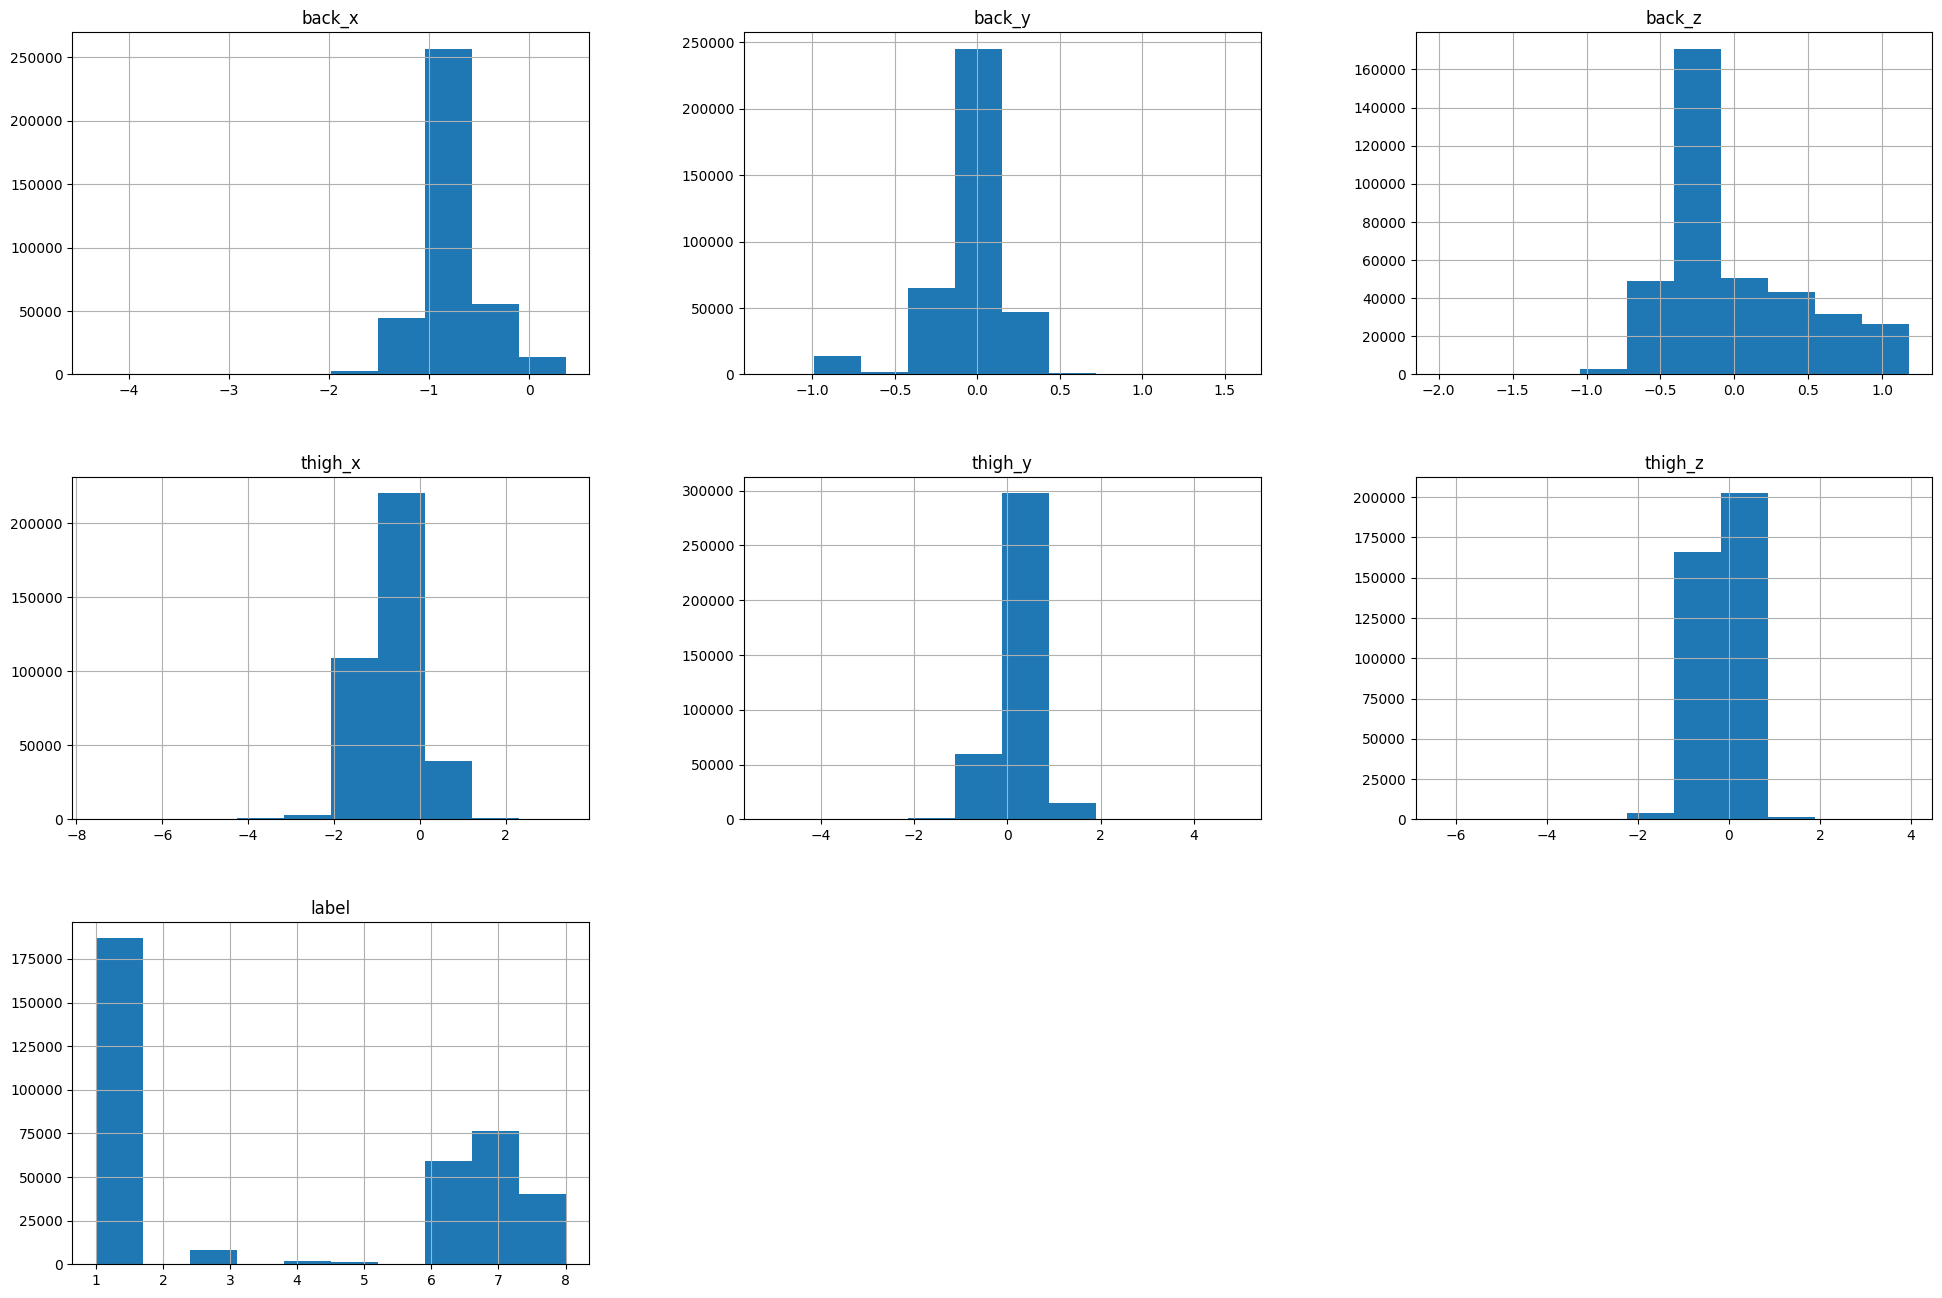

In [12]:
concat_data.hist(figsize=(24, 16))
plt.show()

### Pairplot showing the corelation between features and features and labels 

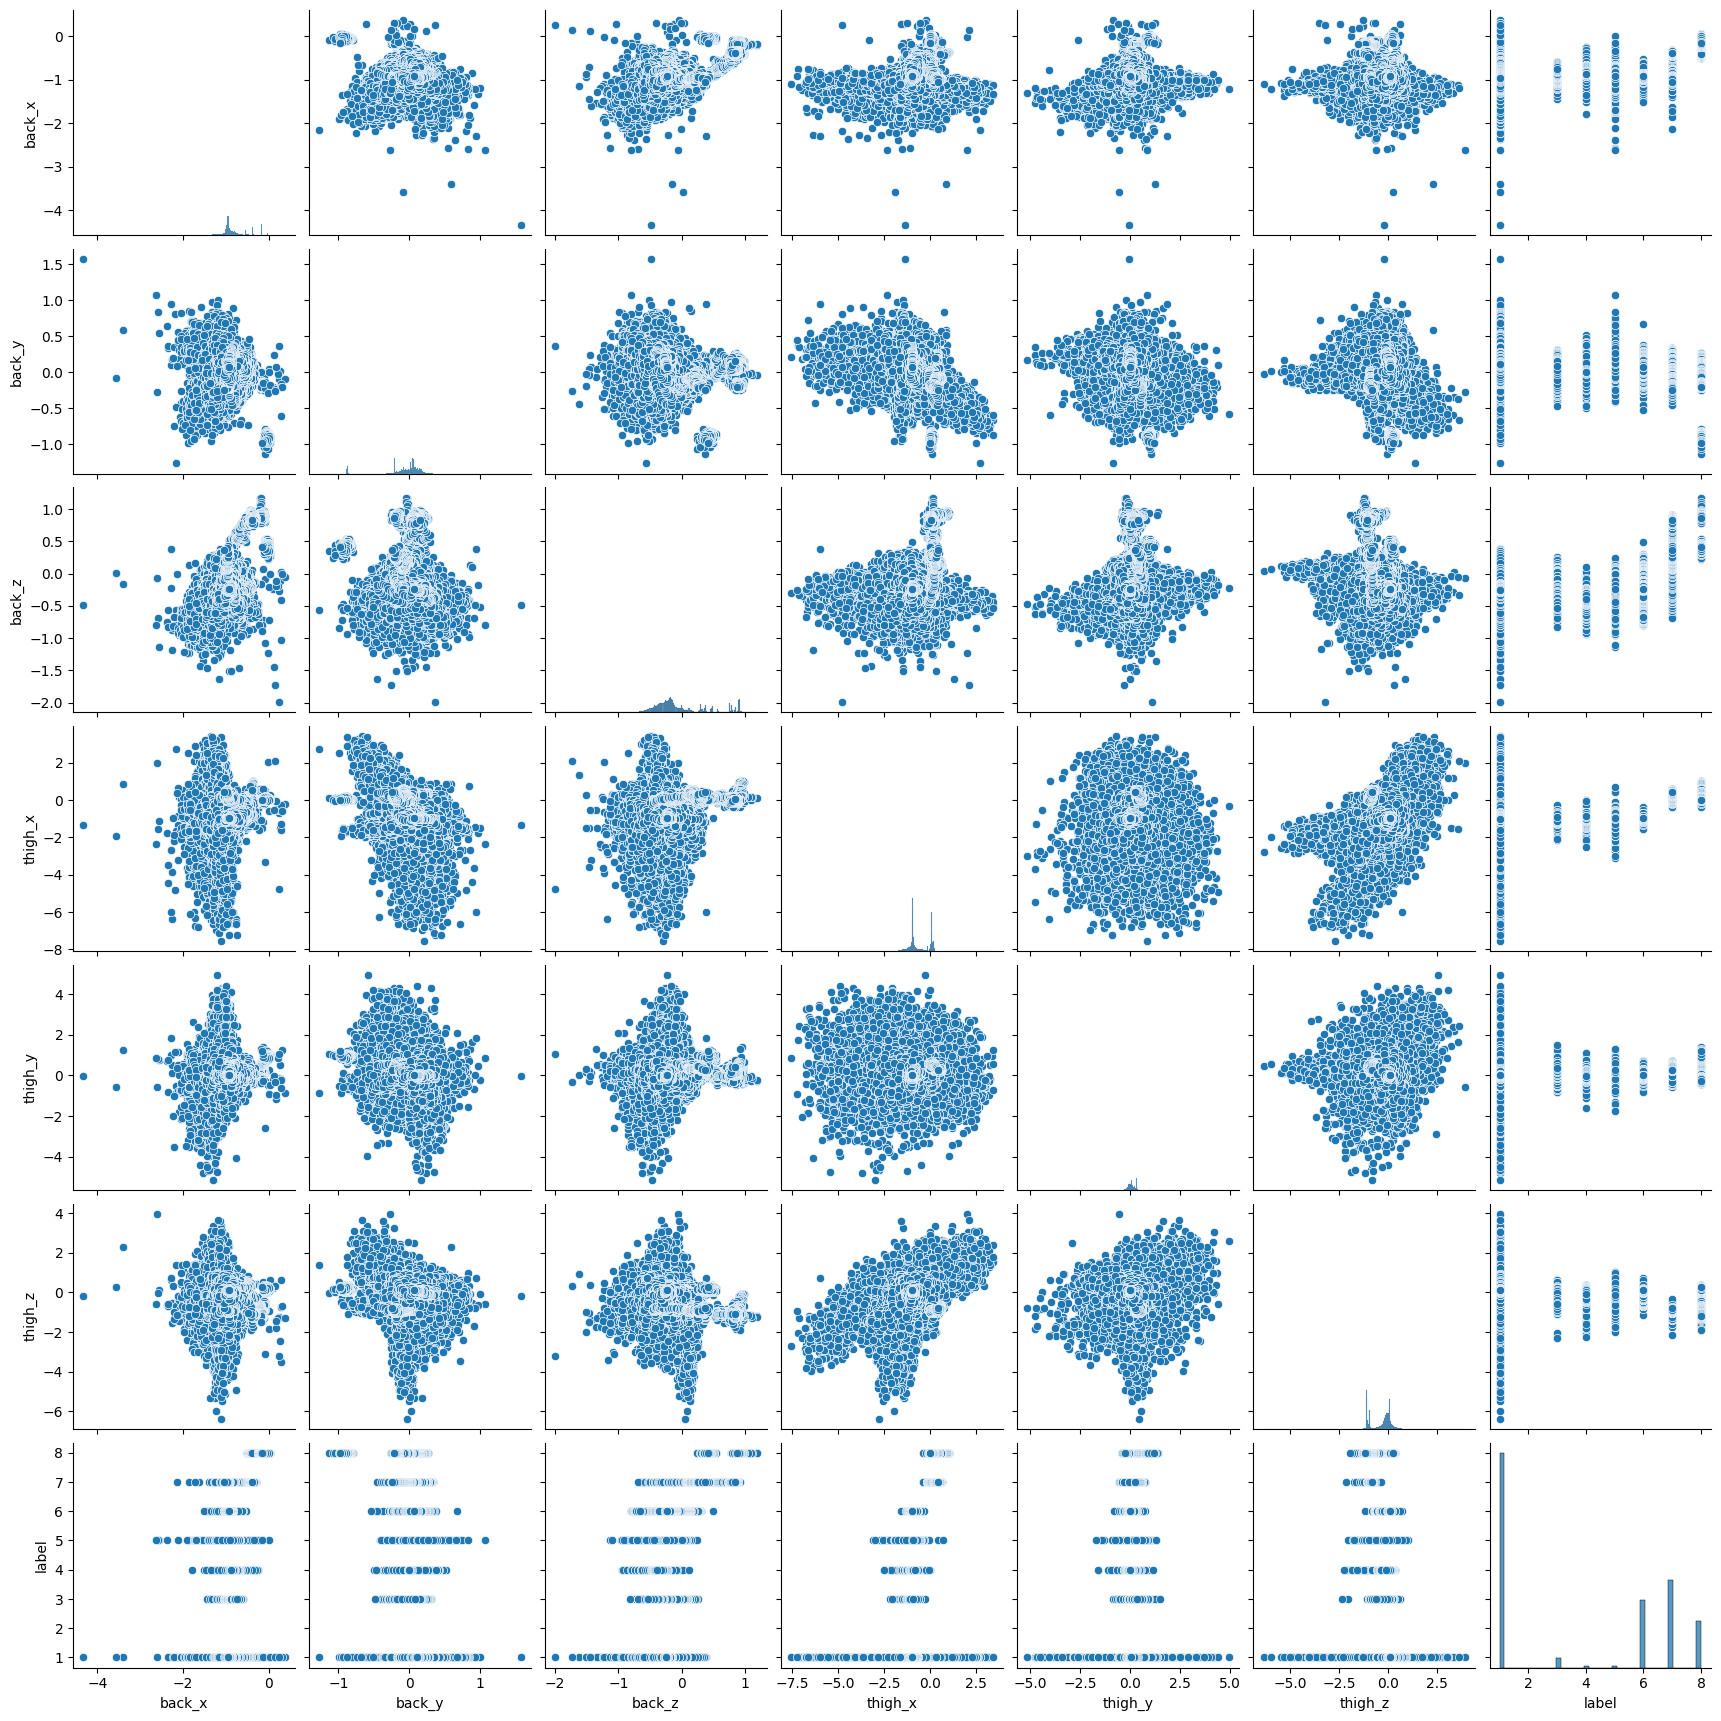

In [13]:
sns.pairplot(concat_data)
plt.show()

### Construct a pie chart showing each class's distribution

In [14]:
#code author VIJAY TAKBHATE
import plotly.graph_objects as go
labels_dic = {1:'walking',3:"shiuffling",4:"stairs (ascending)",5:"stairs (descending)",6:"standing",7:"sitting",8:"lying"}
labels_key = list(labels_dic.keys()) # convert to list, to make it easy to present through graph
labels_values = list(labels_dic.values()) # convert to list, to make it easy to present through graph
counts = []

for label,value in zip(labels_key,labels_values):
    counts.append(len(concat_data[concat_data['label']==label]))

print("sum of counts ---> ",sum(counts),"shape of df_final ---> ",concat_data.shape)

# Creating the pie chart trace
trace = go.Pie(labels=labels_values, values=counts, hoverinfo='label+percent',
               textinfo='percent', textfont_size=12)

# Creating the layout
layout = go.Layout(title='each label density in percentage (%)')

# Creating the figure
fig = go.Figure(data=[trace], layout=layout)

# Displaying the figure
fig.show()

sum of counts --->  374318 shape of df_final --->  (374318, 7)


### Boxplots showing each features correlation to each label

<Axes: xlabel='label', ylabel='back_x'>

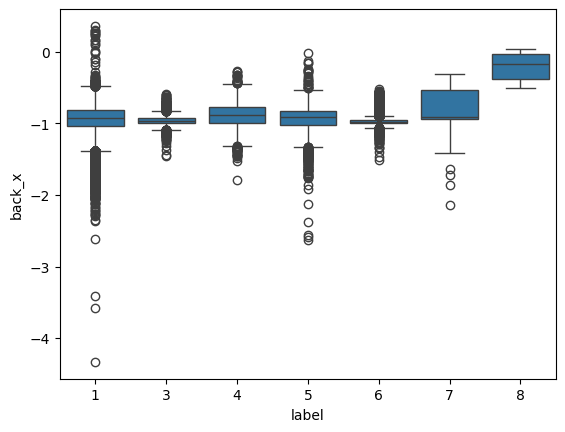

In [46]:
#Boxpolot of back_x and label
sns.boxplot(data=concat_data, x='label', y='back_x')

<Axes: xlabel='label', ylabel='back_y'>

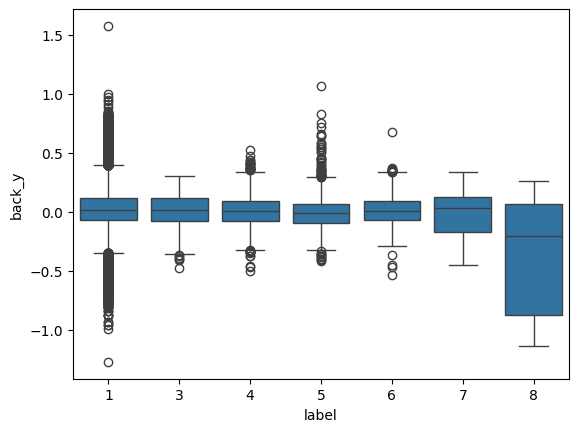

In [41]:
#Boxpolot of back_y and label
sns.boxplot(data=concat_data, x='label', y='back_y')

<Axes: xlabel='label', ylabel='back_z'>

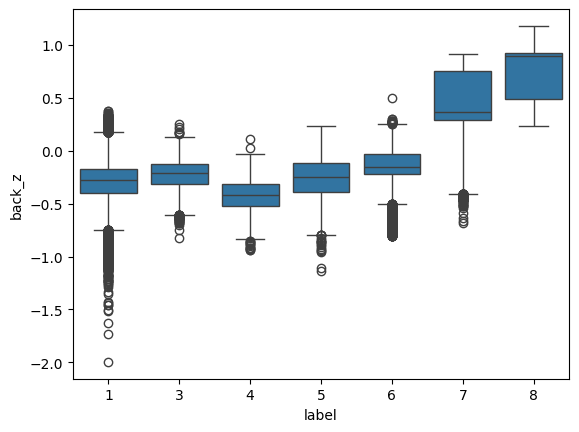

In [42]:
#Boxpolot of back_z and label
sns.boxplot(data=concat_data, x='label', y='back_z')

<Axes: xlabel='label', ylabel='thigh_y'>

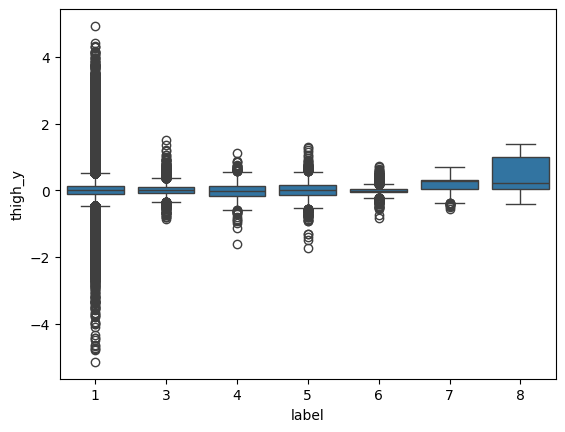

In [43]:
#Boxpolot of thigh_y and label
sns.boxplot(data=concat_data, x='label', y='thigh_y')

<Axes: xlabel='label', ylabel='thigh_x'>

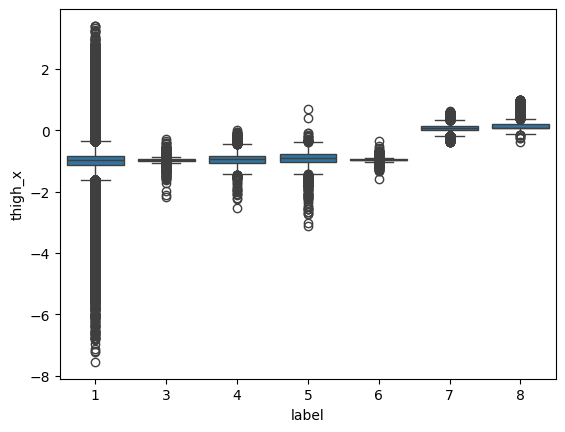

In [44]:
#Boxpolot of thigh_x and label
sns.boxplot(data=concat_data, x='label', y='thigh_x')

<Axes: xlabel='label', ylabel='thigh_z'>

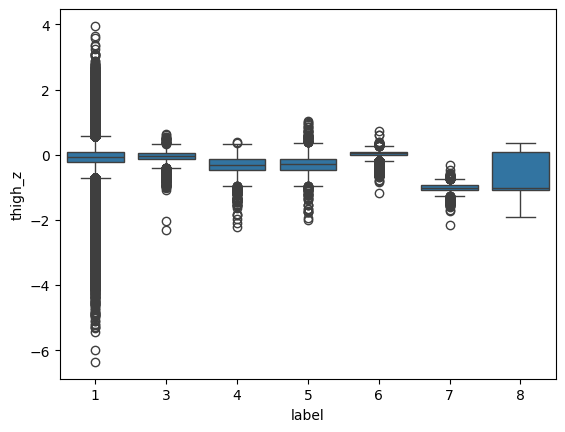

In [45]:
#Boxpolot of thigh_z and label
sns.boxplot(data=concat_data, x='label', y='thigh_z')

# Task 4: prepare Data

In [15]:
from imblearn.over_sampling import SMOTE 
#use smote to get a more balanced data
sm = SMOTE(random_state=14)
X, y = sm.fit_resample(X, y)

### Split the data into 80% training set and 20% testing set

In [16]:
from sklearn.model_selection import train_test_split
#split  data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1046035, 6) (1046035, 1) (261509, 6) (261509, 1)


In [17]:
from imblearn.datasets import make_imbalance
## use a balanced sample of each class of the data
X_train, y_train = make_imbalance(X_train, y_train, sampling_strategy={1: 2000, 3: 2000, 4: 2000, 5: 2000, 6: 2000, 7: 2000, 8: 2000},random_state=14)

prep imports for pipeline

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline


### Pipeline functions

pipe class cause template method RULES

In [19]:
from abc import ABC, abstractmethod

class pipe(ABC):
         
    def runPipe(self):
        pipe=self.defineModel()
        self.memorytransformations()
        self.tuning()
        return self.evaluate(pipe)

    @abstractmethod
    def memorytransformations(self):
        pass
    
    @abstractmethod
    def defineModel(self):
        pass
    
    @abstractmethod
    def tuning(self):
        pass
 
    def evaluate(self,pipe):
        y_predict=pipe.fit(X_train, y_train.values.ravel()).predict(X_test)
        print (classification_report(y_test, y_predict))
        cm = confusion_matrix(y_test, y_predict)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        pipe.steps.append(['ConfusionMatrixDisplay', disp.plot()])
        # disp.plot()
        return y_predict


#### pipeline_SVC class

              precision    recall  f1-score   support

           1       0.78      0.51      0.62     37409
           3       0.51      0.54      0.53     37315
           4       0.68      0.76      0.72     37452
           5       0.70      0.64      0.67     37271
           6       0.65      0.83      0.73     37345
           7       1.00      1.00      1.00     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.75    261509
   macro avg       0.76      0.75      0.75    261509
weighted avg       0.76      0.75      0.75    261509



array([5, 3, 8, ..., 5, 7, 1], dtype=int64)

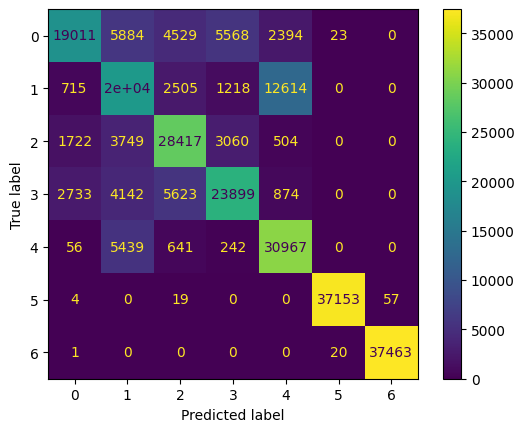

In [20]:


class Pipeline_SVC(pipe):
    def defineModel(self):
        self.pipe_svc = Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC())])
        return self.pipe_svc
        
    def memorytransformations(self):
        return
    def tuning(self):
        return super().tuning()
# Instantiate the concrete class

obj=Pipeline_SVC()


#### pipeline_KNear

In [21]:
class Pipeline_nearestNeighbours(pipe):
    def defineModel(self):
        pipe_nearestNeighbours = Pipeline(steps=[('standardscaler', StandardScaler()),('knear', KNeighborsClassifier(n_neighbors=5,weights="distance",n_jobs=4))])
        return pipe_nearestNeighbours
    def memorytransformations(self):
        return 
    def tuning(self):
        return


#### DecisionTree

In [22]:
class Pipeline_DT(pipe):
    def defineModel(self):
        pipe_tree = Pipeline(steps=[('standardscaler', StandardScaler()),('decisiontree', tree.DecisionTreeClassifier())])
        return pipe_tree
    def memorytransformations(self):
        return
    def tuning(self):
        return



### run models seperately, cause confusion matrix wouldnt run sequetially

              precision    recall  f1-score   support

           1       0.67      0.63      0.65     37409
           3       0.61      0.61      0.61     37315
           4       0.79      0.83      0.81     37452
           5       0.75      0.76      0.75     37271
           6       0.75      0.75      0.75     37345
           7       0.99      1.00      0.99     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.80    261509
   macro avg       0.80      0.80      0.80    261509
weighted avg       0.80      0.80      0.80    261509



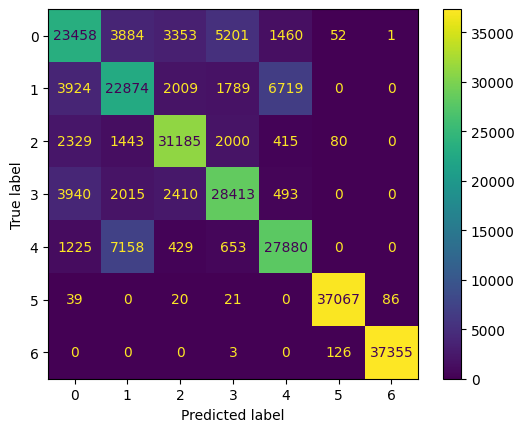

In [23]:

DT=Pipeline_DT()
dt_predict=DT.runPipe()   
    

              precision    recall  f1-score   support

           1       0.89      0.64      0.74     37409
           3       0.71      0.73      0.72     37315
           4       0.86      0.95      0.90     37452
           5       0.84      0.92      0.88     37271
           6       0.80      0.84      0.82     37345
           7       1.00      1.00      1.00     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.87    261509
   macro avg       0.87      0.87      0.87    261509
weighted avg       0.87      0.87      0.87    261509



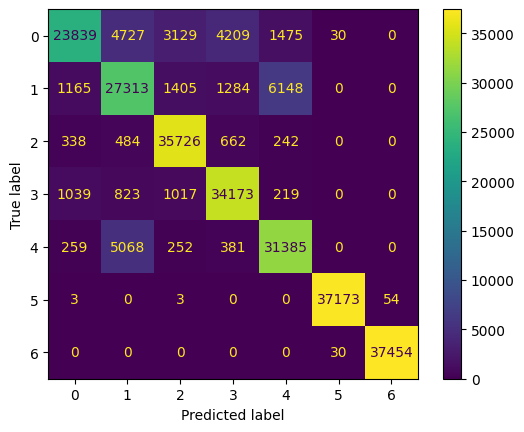

In [24]:
Near=Pipeline_nearestNeighbours()
near_predict=Near.runPipe()

              precision    recall  f1-score   support

           1       0.78      0.51      0.62     37409
           3       0.51      0.54      0.53     37315
           4       0.68      0.76      0.72     37452
           5       0.70      0.64      0.67     37271
           6       0.65      0.83      0.73     37345
           7       1.00      1.00      1.00     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.75    261509
   macro avg       0.76      0.75      0.75    261509
weighted avg       0.76      0.75      0.75    261509



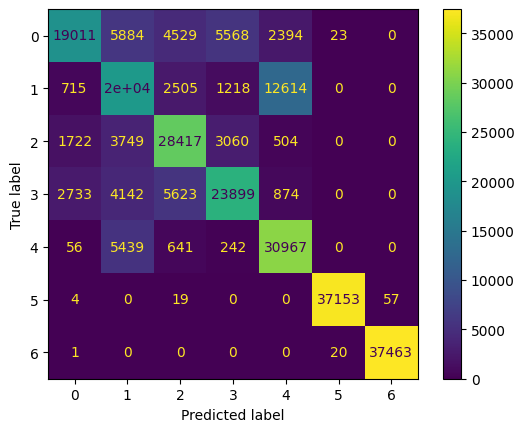

In [25]:

obj=Pipeline_SVC()
svc_predict= obj.runPipe()

In [26]:
#
def compare(y_test, dt_predict, near_predict, svc_predict):

    report = classification_report(y_test, dt_predict, output_dict=True)

    f1_avg_dt = report['macro avg']['f1-score']
    f1_weighted_avg_dt = report['weighted avg']['f1-score']

    report = classification_report(y_test, near_predict, output_dict=True)

    f1_avg_near = report['macro avg']['f1-score']
    f1_weighted_avg_near = report['weighted avg']['f1-score']

    report = classification_report(y_test, svc_predict, output_dict=True)

    f1_avg_svc = report['macro avg']['f1-score']
    f1_weighted_avg_svc = report['weighted avg']['f1-score']

    print("Highest F1 Score: ", max(f1_avg_dt, f1_avg_near, f1_avg_svc))
    print("Highest Weighted F1 Score: ", max(f1_weighted_avg_dt, f1_weighted_avg_near, f1_weighted_avg_svc))

    if f1_avg_dt > f1_avg_near and f1_avg_dt > f1_avg_svc:
        best= "Decision Tree"
    elif f1_avg_near > f1_avg_dt and f1_avg_near > f1_avg_svc:
        best= "Nearest Neighbours"
    elif f1_avg_svc > f1_avg_dt and f1_avg_svc > f1_avg_near:
        best= "SVC"
    else:
        best= "No algorithm with the highest average F1 score"

    if f1_weighted_avg_dt > f1_weighted_avg_near and f1_weighted_avg_dt > f1_weighted_avg_svc:
        best_weighted= "Decision Tree"
    elif f1_weighted_avg_near > f1_weighted_avg_dt and f1_weighted_avg_near > f1_weighted_avg_svc:
        best_weighted= "Nearest Neighbours"
    elif f1_weighted_avg_svc > f1_weighted_avg_dt and f1_weighted_avg_svc > f1_weighted_avg_near:
        best_weighted= "SVC"
    else:
        best_weighted= "No algorithm with the highest weighted average F1 score"
    
    return best, best_weighted



print(compare(y_test,dt_predict,near_predict,svc_predict))


Highest F1 Score:  0.8658887549420736
Highest Weighted F1 Score:  0.8659024042711392
('Nearest Neighbours', 'Nearest Neighbours')


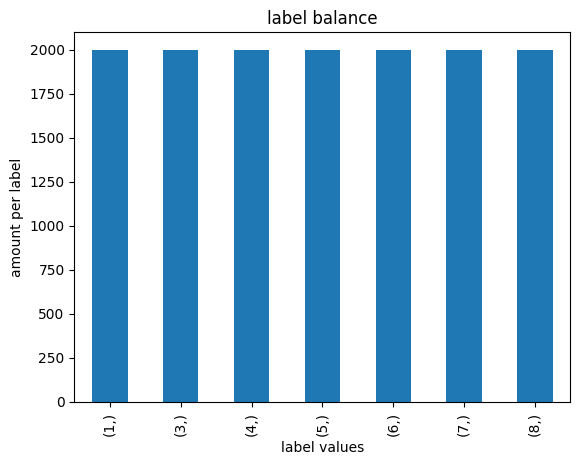

In [27]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [28]:
X_train

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
108162,-1.343994,-0.233154,-0.437500,-1.386719,0.291016,0.067139
87827,-0.691162,0.007812,-0.125488,-0.404297,-0.010254,0.009033
207075,-0.803955,-0.247314,-0.131836,-0.453369,-0.124756,-0.029785
242680,-1.117676,0.022705,0.020020,-1.009277,-0.102051,-0.113037
279377,-0.936768,-0.043457,-0.176270,-0.711426,0.114990,-0.202148
...,...,...,...,...,...,...
1228914,-0.027100,-0.858346,0.479248,0.072510,0.985596,0.085110
1179355,-0.399349,0.126152,0.905628,0.062500,0.079497,-1.078125
1165462,-0.027100,-0.873779,0.494937,0.072510,0.997559,0.089536
1270678,-0.367188,0.062988,0.921631,0.062137,-0.016846,-1.078306


# Task 5 Select and train models

using svc cause


In [29]:
from sklearn.svm import SVC
model_svc = SVC(kernel='poly', C=0.1, gamma=1)
model_svc.fit(X_train, y_train.values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

using nearest neighbour classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_near=KNeighborsClassifier(n_neighbors=5,weights="distance",n_jobs=4)
model_near.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_jobs=4, weights='distance')

Using decision Trees alg


In [31]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

Support is very low for 4 or 5, we have an equal amount of them in the training data. use SMOTE and more data to get more instances of these labels

In [32]:

def displayReport(model):
  y_predict=model.predict(X_test)
  print (classification_report(y_test, y_predict))
  cm = confusion_matrix(y_test, y_predict)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

              precision    recall  f1-score   support

           1       0.70      0.37      0.48     37409
           3       0.39      0.36      0.37     37315
           4       0.54      0.71      0.62     37452
           5       0.58      0.53      0.55     37271
           6       0.58      0.75      0.65     37345
           7       1.00      1.00      1.00     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.67    261509
   macro avg       0.68      0.67      0.67    261509
weighted avg       0.68      0.67      0.67    261509



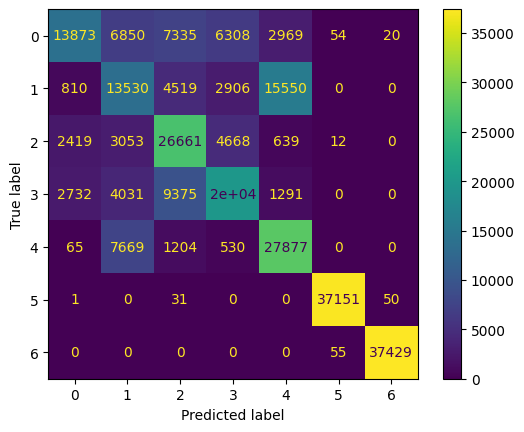

In [33]:
displayReport(model_svc)



              precision    recall  f1-score   support

           1       0.90      0.65      0.75     37409
           3       0.73      0.74      0.73     37315
           4       0.86      0.96      0.91     37452
           5       0.84      0.92      0.88     37271
           6       0.80      0.85      0.82     37345
           7       1.00      1.00      1.00     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.87    261509
   macro avg       0.88      0.87      0.87    261509
weighted avg       0.88      0.87      0.87    261509



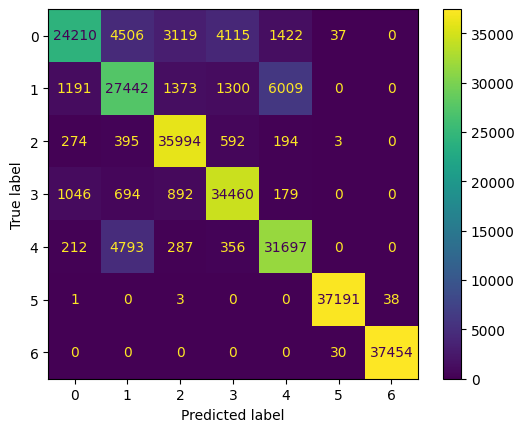

In [34]:
displayReport(model_near)

              precision    recall  f1-score   support

           1       0.68      0.63      0.65     37409
           3       0.61      0.62      0.61     37315
           4       0.79      0.83      0.81     37452
           5       0.75      0.77      0.76     37271
           6       0.75      0.75      0.75     37345
           7       0.99      1.00      0.99     37233
           8       1.00      1.00      1.00     37484

    accuracy                           0.80    261509
   macro avg       0.80      0.80      0.80    261509
weighted avg       0.80      0.80      0.80    261509



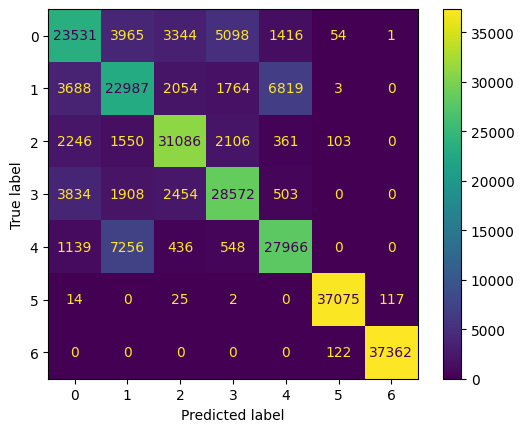

In [35]:
displayReport(model_tree)

# Task 6: fine tuning models

Defining a reusable function

In [36]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, X, y, param_grid):
    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

    # Fit the object to the data
    grid_search.fit(X, y)

    return grid_search.best_params_

for SVC

In [37]:
# svc_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
# }
# # grid_search(SVC(),X_train,y_train,svc_grid)
# grid_search = GridSearchCV(SVC(), svc_grid, cv=5, n_jobs=-2)

# # Fit the object to the data
# grid_search.fit(X, y)

# print(grid_search.best_params_)

For TreeDecision

For